### Regional Hydrology

- The California Water Year starts in October and ends in September 
- When can you expect peak run-off (Q) in a river system that is primarily fed by snow melt (e.g. the rivers fed by snowmelt from the Sierra Nevada Mountains)?
    - May through July (late Spring, early Summer)
- Precipitation has interacted with warming temperatures. The last few decades have increased the size of the atmospheric sponge, thus tending to increase evapotranspiration from soils, from vegetation, and snow. 
- Recipe for intense rainfall in the West
    - Moisture
        - brought in from the Pacific Ocean, the Gulf of Mexico, and some preferred pathways up through the Gulf of California
    - Lift
        - when air lifts up high enough in the atmosphere so it condenses and forms the liquid that will eventually become rain
        - How?
            - Wind. Wind funneling up against the mountains
    - Instability:
        - Warm air close to the ground rises very quickly
- Rainfall intensity
    - A combination of moisture, lift, and instability
    - And a long enough duration event
    
- General trends
    - We expect the northwest to get a bit wetter and the southwest to get a bit drier
    - In the West: generally drier summers and generally wetter winters
    - **Note: warmer temperatures may mean that snow may start falling as rain instead**
        - **Important because snowpacks acts as a natural reservoir, releasing it when we want it**
        - **If water falls as rain, we’ll catch a lot less of it**
- Timing of water supply
    - Warmer temperatures means snow melts faster and sooner
    - **In the southwest, snowpacks have melted 1 month faster because of warmer temps**
    - Earlier snowmelt means
        - earlier peak runoff (when there is the most water in the steam)
            - this is when we try to catch water and store it for later use
        - and longer low flows in the stream


In [3]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [4]:
# Import data

DATA_PATH = 'Projects/ML_Earth_Projects/Reservoir_Project/Data'

In [9]:
basin_inflow = pd.read_excel(f'{DATA_PATH}/Custom/basin_inflow.xlsx', index_col=0)

In [10]:
basin_inflow.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2008-01-01,27.666,9.52,0.00,44,58,34,20.24,0.00,38,7.67,...,30,7.90,44,55,37,7.72,0.04,40,61,30
2008-01-02,30.044,9.52,0.00,47,57,39,20.36,0.12,38,7.79,...,30,7.88,38,46,32,7.76,0.04,39,63,29
2008-01-03,48.478,9.76,0.24,45,50,38,20.36,0.00,39,7.79,...,30,7.86,30,35,25,7.76,0.00,40,53,29
2008-01-04,90.246,11.28,1.52,46,50,42,25.76,5.40,45,8.15,...,33,8.27,31,33,28,11.00,3.24,39,47,32
2008-01-05,200.200,11.96,0.68,41,46,37,27.44,1.68,58,11.75,...,33,8.27,31,33,28,12.04,1.04,33,38,32


In [11]:
"""
Summary statistics 

Notes
- There are negative snow depths and snow water content (droughts)
- I have not found a negative min temp (yet)
"""
basin_inflow.describe()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,...,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,101.714391,20.923865,0.091182,61.257724,73.851643,51.001962,53.753085,0.246896,27.433055,8.190920,...,34.148112,11.142903,45.063512,54.541197,37.917607,31.849402,0.142065,53.956106,71.763610,40.485042
std,171.229725,13.522791,0.320736,13.516949,17.037502,11.032340,37.785032,0.653448,39.577624,13.433769,...,49.332494,16.001879,13.865843,15.448083,13.181329,23.716505,0.464197,13.620430,17.375523,10.026854
min,5.210000,0.000000,0.000000,31.000000,36.000000,2.000000,0.000000,0.000000,-2.000000,-0.730000,...,-81.000000,-3.090000,11.000000,17.000000,2.000000,0.000000,0.000000,21.000000,33.000000,11.000000
25%,31.290000,9.840000,0.000000,50.000000,59.000000,42.000000,26.080000,0.000000,1.000000,-0.120000,...,2.000000,0.610000,35.000000,43.000000,29.000000,13.930000,0.000000,43.000000,58.000000,32.000000
50%,50.475000,21.480000,0.000000,60.000000,73.000000,50.000000,51.600000,0.000000,5.000000,0.480000,...,6.000000,2.630000,44.000000,54.000000,36.000000,29.440000,0.000000,52.000000,72.000000,39.500000
75%,106.209500,27.590000,0.000000,73.000000,89.000000,60.000000,70.320000,0.120000,44.000000,11.510000,...,57.000000,19.325000,57.000000,68.000000,49.000000,43.520000,0.040000,67.000000,87.000000,49.000000
max,3189.633000,53.920000,4.680000,92.000000,110.000000,80.000000,158.600000,9.040000,160.000000,57.230000,...,185.000000,70.140000,75.000000,87.000000,68.000000,97.520000,5.760000,84.000000,108.000000,68.000000


In [13]:
basin_inflow.columns

Index(['INFLOW', 'ADR_PRECIP_ACC', 'ADR_PRECIP_INCR', 'ADR_TEMP_AVG',
       'ADR_TEMP_MAX', 'ADR_TEMP_MIN', 'HYS_PRECIP_ACC', 'HYS_PRECIP_INCR',
       'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT', 'HYS_TEMP_AVG',
       'HYS_TEMP_MAX', 'HYS_TEMP_MIN', 'DUN_PRECIP_ACC', 'DUN_WIND_GUST',
       'DUN_WIND_SPEED', 'DUN_TEMP_AVG', 'DUN_TEMP_MAX', 'DUN_TEMP_MIN',
       'SGP_PRECIP_ACC', 'SGP_PRECIP_INCR', 'SGP_TEMP_AVG', 'SGP_TEMP_MAX',
       'SGP_TEMP_MIN', 'FRN_PRECIP_ACC', 'FRN_PRECIP_INCR', 'FRN_SNOW_DEPTH',
       'FRN_SNOW_WATER_CONTENT', 'FRN_TEMP_AVG', 'FRN_TEMP_MAX',
       'FRN_TEMP_MIN', 'PFH_PRECIP_ACC', 'PFH_PRECIP_INCR', 'PFH_TEMP_AVG',
       'PFH_TEMP_MAX', 'PFH_TEMP_MIN'],
      dtype='object')

#### Identifying correlations

Areas to inspect:
- Timing of water supply: warmer temperatures means snow melts faster and sooner
- Rainfall intensity (storms). An element is lift: when air lifts up high enough in the atmosphere so it condenses and forms the liquid that will eventually become rain. This occurs when wind is funneling up against the mountains. 
- Timing of water supply: Warmer temperatures may mean that snow may start falling as rain instead, resulting in a smaller natural reservoirs (snowpacks) and lower flows in the late summer months

In [12]:
"""
Options:
- Create lagged data
- Make data stationary (remove seasonality)
    - Seasonal data is differenced by substracting (finding the difference between) 
      an observation from the same time in the previous cycle
"""

# differences a whole dataset
def difference(dataset, interval=1):
    cols = []
    for col in dataset.columns: 
        col_data = dataset[col]
        series = col_data.values
        diff = list()
        for i in range(interval, len(series)):
            value = series[i] - series[i - interval]
            diff.append(value)
        cols.append(pd.Series(diff))
    
    return pd.concat(cols, axis=1)

In [18]:
def handle_missing(df):
  # forward fill missing values
  df.ffill(axis=0, inplace=True)

In [15]:
# A California Water Year starts in October and ends in September 

INFLOW_WATER_YEAR_2016_2018 = basin_inflow.loc['2016-10-01':'2018-09-30']
INFLOW_WATER_YEAR_2016_2018.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2016-10-01,29.393,0.0,0.0,60,76,47,0.00,0.00,0,-0.24,...,0,0.5,44,60,33,0.00,0.00,52,77,36
2016-10-02,43.183,0.0,0.0,55,66,48,0.00,0.00,0,-0.24,...,0,0.5,44,60,33,0.12,0.12,45,64,31
2016-10-03,29.534,0.0,0.0,53,60,45,0.12,0.12,0,0.00,...,0,0.5,44,60,33,0.16,0.04,44,51,35
2016-10-04,32.819,0.0,0.0,58,72,47,0.24,0.12,1,0.12,...,0,0.5,44,60,33,0.20,0.04,49,70,36
2016-10-05,18.264,0.0,0.0,59,75,47,0.24,0.00,0,0.00,...,0,0.5,44,60,33,0.20,0.00,47,73,33


In [16]:
# FRN

FRN_SWE_INFLOW_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['FRN_SNOW_WATER_CONTENT', 'INFLOW']]

FRN_PRECIP_ACC_INFLOW_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['FRN_PRECIP_ACC', 'INFLOW']]

FRN_PRECIP_ACC_SWE_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['FRN_SNOW_WATER_CONTENT', 'FRN_PRECIP_ACC']]

FRN_SWE_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['FRN_SNOW_WATER_CONTENT', 'FRN_TEMP_MAX']]

FRN_PRECIP_ACC_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['FRN_PRECIP_ACC', 'FRN_TEMP_MAX']]

# HYS

HYS_SWE_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['HYS_SNOW_WATER_CONTENT', 'HYS_TEMP_MAX']]

# DUN

DUN_PRECIP_ACC_WIND_SPEED_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['DUN_PRECIP_ACC', 'DUN_WIND_SPEED']]

DUN_PRECIP_ACC_WIND_GUST_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['DUN_PRECIP_ACC', 'DUN_WIND_GUST']]

# SGP

SGP_PRECIP_ACC_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['SGP_PRECIP_ACC', 'SGP_TEMP_MAX']]

# ADR

ADR_PRECIP_ACC_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, ['ADR_PRECIP_ACC', 'ADR_TEMP_MAX']]

In [19]:
# CA water year: ['2016-10-01':'2018-09-30'] 

# interval for differencing data
days = 365

# difference data

FRN_SWE_INFLOW = FRN_SWE_INFLOW_WY_2016_2018.copy()
stationary_FRN_SWE_INFLOW = difference(FRN_SWE_INFLOW, days)
stationary_FRN_SWE_INFLOW.index = FRN_SWE_INFLOW.index[days:]
stationary_FRN_SWE_INFLOW.columns = ['FRN_SNOW_WATER_CONTENT', 'INFLOW']
handle_missing(stationary_FRN_SWE_INFLOW)
print("Null/NaN count: ", stationary_FRN_SWE_INFLOW.isnull().sum().sum())

FRN_PRECIP_ACC_INFLOW = FRN_PRECIP_ACC_INFLOW_WY_2016_2018.copy()
stationary_FRN_PRECIP_ACC_INFLOW = difference(FRN_PRECIP_ACC_INFLOW, days)
stationary_FRN_PRECIP_ACC_INFLOW.index = FRN_PRECIP_ACC_INFLOW.index[days:]
stationary_FRN_PRECIP_ACC_INFLOW.columns = ['FRN_PRECIP_ACC', 'INFLOW']
handle_missing(stationary_FRN_PRECIP_ACC_INFLOW)
print("Null/NaN count: ", stationary_FRN_PRECIP_ACC_INFLOW.isnull().sum().sum())

FRN_PRECIP_ACC_SWE = FRN_PRECIP_ACC_SWE_WY_2016_2018.copy()
stationary_FRN_PRECIP_ACC_SWE = difference(FRN_PRECIP_ACC_SWE, days)
stationary_FRN_PRECIP_ACC_SWE.index = FRN_PRECIP_ACC_SWE.index[days:]
stationary_FRN_PRECIP_ACC_SWE.columns = ['FRN_SNOW_WATER_CONTENT', 'FRN_PRECIP_ACC']
handle_missing(stationary_FRN_PRECIP_ACC_SWE)
print("Null/NaN count: ", stationary_FRN_PRECIP_ACC_SWE.isnull().sum().sum())

FRN_SWE_TEMP_MAX = FRN_SWE_TEMP_MAX_WY_2016_2018.copy()
stationary_FRN_SWE_TEMP_MAX = difference(FRN_SWE_TEMP_MAX, days)
stationary_FRN_SWE_TEMP_MAX.index = FRN_SWE_TEMP_MAX.index[days:]
stationary_FRN_SWE_TEMP_MAX.columns = ['FRN_SNOW_WATER_CONTENT', 'FRN_TEMP_MAX']
handle_missing(stationary_FRN_SWE_TEMP_MAX)
print("Null/NaN count: ", stationary_FRN_SWE_TEMP_MAX.isnull().sum().sum())

FRN_PRECIP_ACC_TEMP_MAX = FRN_PRECIP_ACC_TEMP_MAX_WY_2016_2018.copy()
stationary_FRN_PRECIP_ACC_TEMP_MAX = difference(FRN_PRECIP_ACC_TEMP_MAX, days)
stationary_FRN_PRECIP_ACC_TEMP_MAX.index = FRN_PRECIP_ACC_TEMP_MAX.index[days:]
stationary_FRN_PRECIP_ACC_TEMP_MAX.columns = ['FRN_PRECIP_ACC', 'FRN_TEMP_MAX']
handle_missing(stationary_FRN_PRECIP_ACC_TEMP_MAX)
print("Null/NaN count: ", stationary_FRN_PRECIP_ACC_TEMP_MAX.isnull().sum().sum())

HYS_SWE_TEMP_MAX = HYS_SWE_TEMP_MAX_WY_2016_2018.copy()
stationary_HYS_SWE_TEMP_MAX = difference(HYS_SWE_TEMP_MAX, days)
stationary_HYS_SWE_TEMP_MAX.index = HYS_SWE_TEMP_MAX.index[days:]
stationary_HYS_SWE_TEMP_MAX.columns = ['HYS_SNOW_WATER_CONTENT', 'HYS_TEMP_MAX']
handle_missing(stationary_HYS_SWE_TEMP_MAX)
print("Null/NaN count: ", stationary_HYS_SWE_TEMP_MAX.isnull().sum().sum())

DUN_PRECIP_ACC_WIND_SPEED = DUN_PRECIP_ACC_WIND_SPEED_WY_2016_2018.copy()
stationary_DUN_PRECIP_ACC_WIND_SPEED = difference(DUN_PRECIP_ACC_WIND_SPEED, days)
stationary_DUN_PRECIP_ACC_WIND_SPEED.index = DUN_PRECIP_ACC_WIND_SPEED.index[days:]
stationary_DUN_PRECIP_ACC_WIND_SPEED.columns = ['DUN_PRECIP_ACC', 'DUN_WIND_SPEED']
handle_missing(stationary_DUN_PRECIP_ACC_WIND_SPEED)
print("Null/NaN count: ", stationary_DUN_PRECIP_ACC_WIND_SPEED.isnull().sum().sum())

DUN_PRECIP_ACC_WIND_GUST = DUN_PRECIP_ACC_WIND_GUST_WY_2016_2018.copy()
stationary_DUN_PRECIP_ACC_WIND_GUST = difference(DUN_PRECIP_ACC_WIND_GUST, days)
stationary_DUN_PRECIP_ACC_WIND_GUST.index = DUN_PRECIP_ACC_WIND_GUST.index[days:]
stationary_DUN_PRECIP_ACC_WIND_GUST.columns = ['DUN_PRECIP_ACC', 'DUN_WIND_GUST']
handle_missing(stationary_DUN_PRECIP_ACC_WIND_GUST)
print("Null/NaN count: ", stationary_DUN_PRECIP_ACC_WIND_GUST.isnull().sum().sum())

SGP_PRECIP_ACC_TEMP_MAX = SGP_PRECIP_ACC_TEMP_MAX_WY_2016_2018.copy()
stationary_SGP_PRECIP_ACC_TEMP_MAX = difference(SGP_PRECIP_ACC_TEMP_MAX, days)
stationary_SGP_PRECIP_ACC_TEMP_MAX.index = SGP_PRECIP_ACC_TEMP_MAX.index[days:]
stationary_SGP_PRECIP_ACC_TEMP_MAX.columns = ['SGP_PRECIP_ACC', 'SGP_TEMP_MAX']
handle_missing(stationary_SGP_PRECIP_ACC_TEMP_MAX)
print("Null/NaN count: ", stationary_SGP_PRECIP_ACC_TEMP_MAX.isnull().sum().sum())

ADR_PRECIP_ACC_TEMP_MAX = ADR_PRECIP_ACC_TEMP_MAX_WY_2016_2018.copy()
stationary_ADR_PRECIP_ACC_TEMP_MAX = difference(ADR_PRECIP_ACC_TEMP_MAX, days)
stationary_ADR_PRECIP_ACC_TEMP_MAX.index = ADR_PRECIP_ACC_TEMP_MAX.index[days:]
stationary_ADR_PRECIP_ACC_TEMP_MAX.columns = ['ADR_PRECIP_ACC', 'ADR_TEMP_MAX']
handle_missing(stationary_ADR_PRECIP_ACC_TEMP_MAX)
print("Null/NaN count: ", stationary_ADR_PRECIP_ACC_TEMP_MAX.isnull().sum().sum())

Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0
Null/NaN count:  0


In [20]:
# ADR

# check if stationary
result = adfuller(stationary_ADR_PRECIP_ACC_TEMP_MAX["ADR_TEMP_MAX"])

"""
Since the test statistic is smaller than the critical value at 1%, we can reject the null hypothesis 
with a significance level of less than 1%. Rejecting the null hypothesis means the process has no unit root,
and the time series is stationary or does not have a time-dependent structure.
"""

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.572168
p-value: 0.006316
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


<Axes: xlabel='FRN_SNOW_WATER_CONTENT', ylabel='FRN_PRECIP_ACC'>

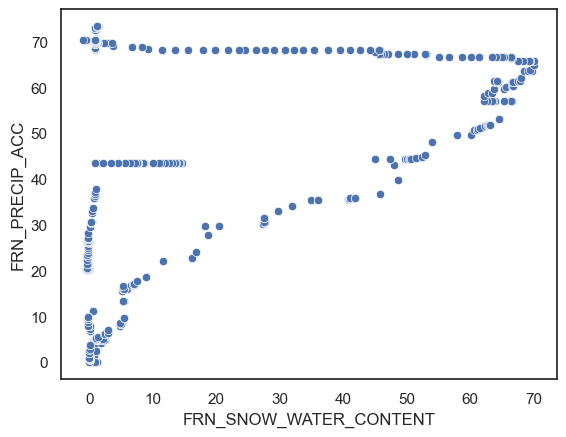

In [22]:
sns.scatterplot(data=FRN_PRECIP_ACC_SWE, x="FRN_SNOW_WATER_CONTENT", y="FRN_PRECIP_ACC") 

<Axes: xlabel='FRN_SNOW_WATER_CONTENT', ylabel='FRN_PRECIP_ACC'>

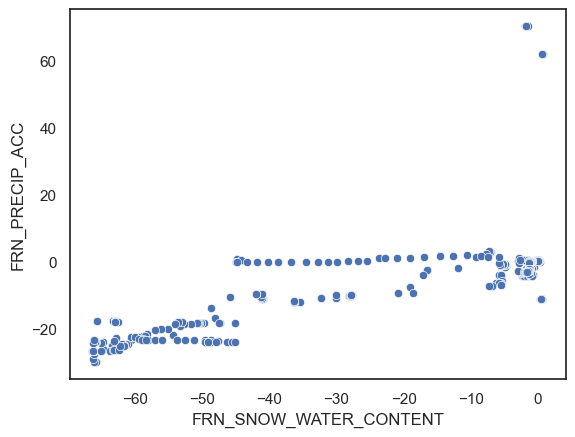

In [23]:
# differenced
sns.scatterplot(data=stationary_FRN_PRECIP_ACC_SWE, x="FRN_SNOW_WATER_CONTENT", y="FRN_PRECIP_ACC")

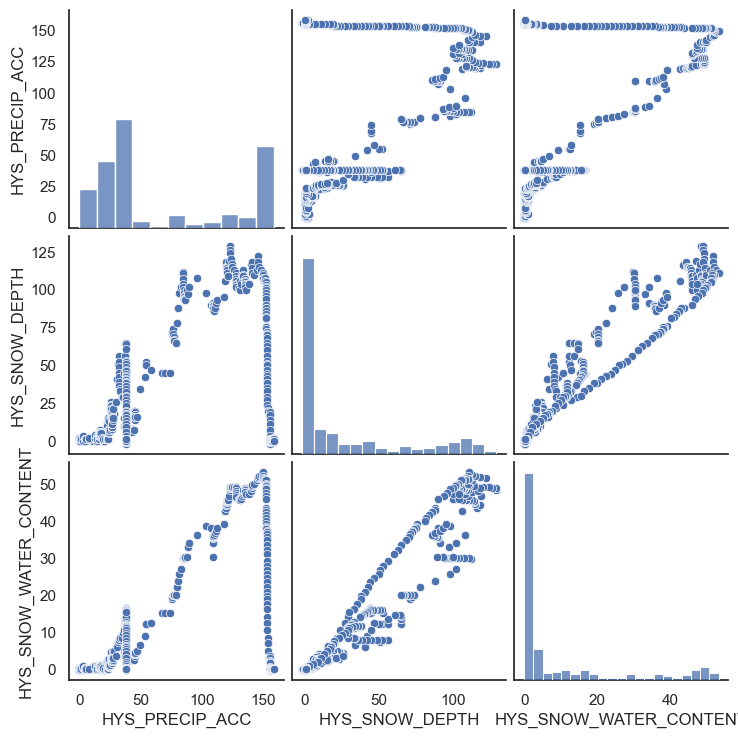

In [24]:
# Pair plot

HYS_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'HYS_PRECIP_ACC', 'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT']] 

sns.pairplot(HYS_2016_2018)

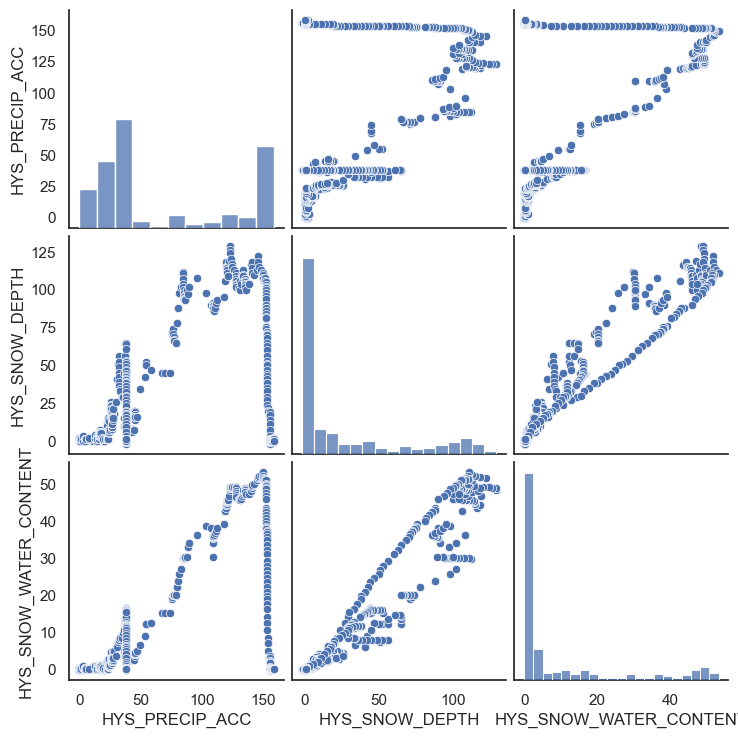

In [25]:
HYS_2016_2018_DIFF = HYS_2016_2018.copy()
stationary_HYS_2016_2018_DIFF = difference(HYS_2016_2018_DIFF, days)
stationary_HYS_2016_2018_DIFF.index = HYS_2016_2018_DIFF.index[days:]
stationary_HYS_2016_2018_DIFF.columns = ['HYS_PRECIP_ACC', 'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT']
handle_missing(HYS_2016_2018_DIFF)

sns.pairplot(HYS_2016_2018_DIFF)

In [ ]:
# Heatmap 

